# Chapter 2. Supervised Learning methods.
# Part 7. Deep Learning.

## - Some datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

## Forge dataset (artificial)

In [3]:
#taking datasets
X, y = mglearn.datasets.make_forge()
X.shape

/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)

Text(0, 0.5, 'Second feature')

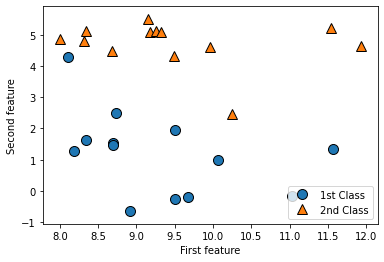

In [4]:
#building plot
#%matplotlib inline #allows to add plots to the browser inteface
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #plot building

plt.legend(["1st Class", "2nd Class"], loc=4) #legend
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Wave dataset (artificial)

In [5]:
#taking datasets
X, y = mglearn.datasets.make_wave(n_samples =40)
X.shape

(40, 1)

Text(0, 0.5, 'Target value')

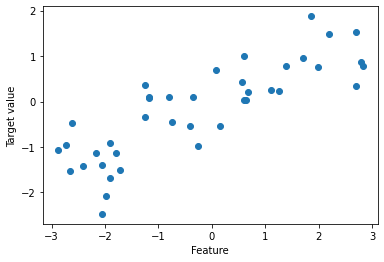

In [6]:
#building plot
plt.plot(X, y, 'o')

plt.xlabel("Feature")
plt.ylabel("Target value")

## Cancer dataset (natural)

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [8]:
print(cancer.keys())
print(cancer.data.shape)
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
#building a hash table to examine dataset
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

## Boston Housing dataset (natural)

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


## Boston Housing extended dataset (natural)

In [12]:
X, y = mglearn.datasets.load_extended_boston()

#104 features are previous 13 default features...
#...plus 91 derivative features
X.shape

(506, 104)

## - Setting up Neural Network

There are 'MLPClassifier' and 'MLPRegression'. But focus in this chapter would be at classifier.

By default MLP uses 1 hidden layer with 100 units and relu activation function.

Text(0, 0.5, 'Feature 1')

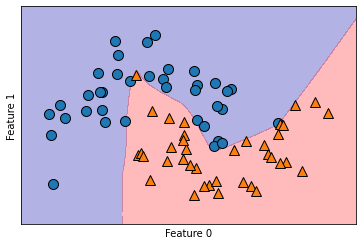

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

#loading dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
#initializaing model and building
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

#decision border visualization
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

^ Result is quite good but 100 units could be too much

Reducing units count to 10:

/home/akado/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

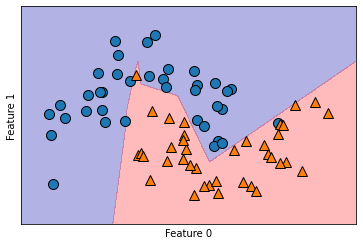

In [18]:
#model initialization and building
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
#decision border visualization
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

To get smoother border there could be increased count of hidden layers and/or change activation function:

/home/akado/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

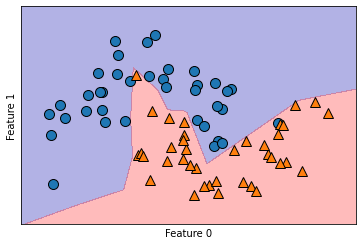

In [20]:
#2 hidden layers, 10 units each, relu function
#model initialization and building
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
#border visualization
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

/home/akado/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

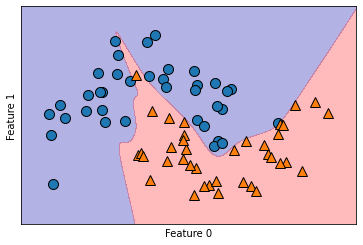

In [21]:
#2 hidden layers, 10 units each, tanh function
#model initialization and building
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
#border visualization
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

There's the param 'alpha' to control L2 regularization

/home/akado/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/akado/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/akado/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

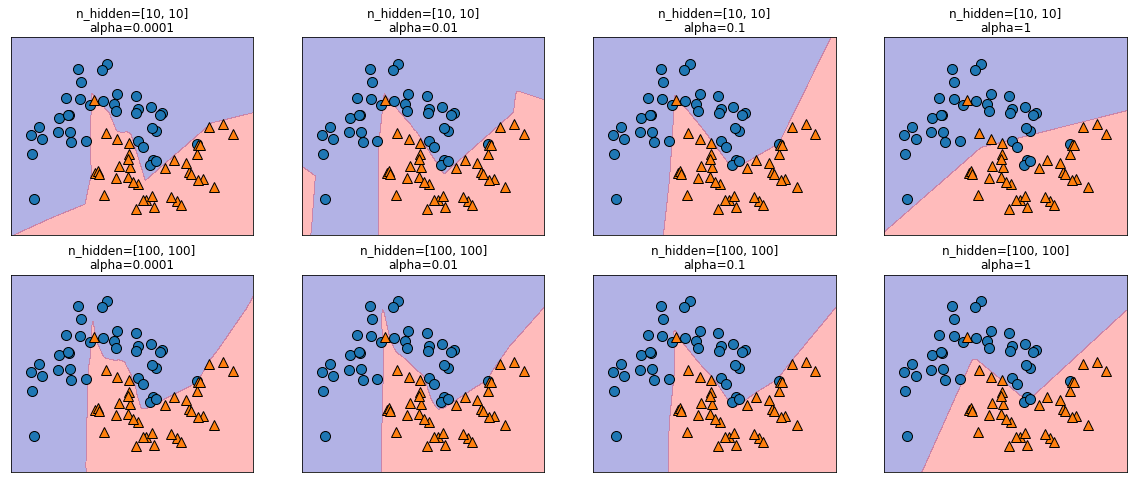

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha).fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

MLP with another dataset:

In [24]:
print('Max feature values:\n{}'.format(cancer.data.max(axis=0)))

Max feature values:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [26]:
#loading dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
#model initialization and building
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
#model validation
print('train accuracy: {}'.format(mlp.score(X_train, y_train)))
print('test accuracy: {}'.format(mlp.score(X_test , y_test)))

train accuracy: 0.9389671361502347
test accuracy: 0.916083916083916


^ Gain accuracy is decent but isn't excellent.

Neural Networks require scaled data with Mean as 0 and Dispersion as 1 (as perfect option)

Manually scaling data (there's the 'StandardScaler' method for that):

In [27]:
#mean of each feature values for train set
mean_on_train = X_train.mean(axis=0)
#standard deviation for each feature of train set
std_on_train = X_train.std(axis=0)

#subtracting mean and multiplying by reciprocal of standard deviation
# mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
#same for test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Train accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Train accuracy: 0.991
Test accuracy: 0.965


/home/akado/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


^ Accuracy increased.

Warning tells that max iterations reached.

Increasing max iterations count:

In [29]:
#model initialization and building
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train_scaled, y_train)
#model validation
print('train accuracy: {}'.format(mlp.score(X_train_scaled , y_train)))
print('test accuracy: {}'.format(mlp.score(X_test_scaled , y_test)))

train accuracy: 1.0
test accuracy: 0.972027972027972


^ Accuracy increased and is excellent.

Adjusting params could increase it even more

Adjusting 'alpha' param from '0.0001' to '1' to increase regularization:

In [56]:
#model initialization and building
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0).fit(X_train_scaled, y_train)
#model validation
print('train accuracy: {}'.format(mlp.score(X_train_scaled, y_train)))
print('test accuracy: {}'.format(mlp.score(X_test_scaled, y_test)))

train accuracy: 0.9882629107981221
test accuracy: 0.972027972027972


^ According to book it was about to help but sklearn had updated MLP indeed.

## - NN Analysis

Regularly its useful to analyse model weights (https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)

But for current cancer dataset its going to be difficult. Another method used:

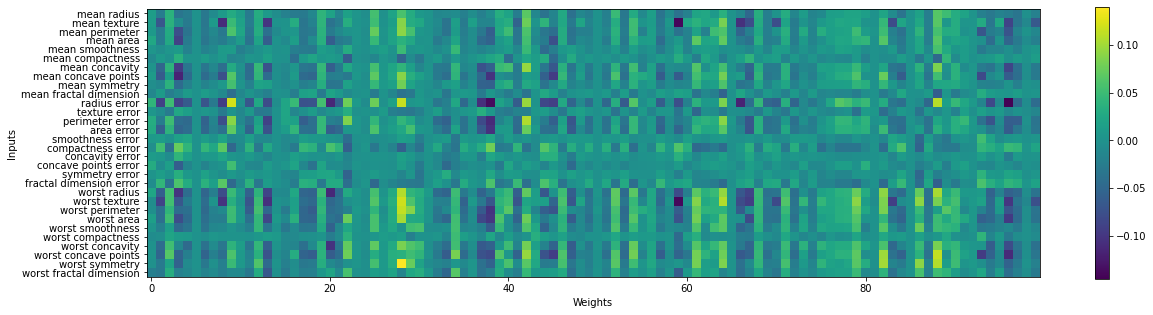

In [58]:
plt.figure(figsize=(20,5))
#rendering weights heatmap for 1st layer
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Weights')
plt.ylabel('Inputs')
plt.colorbar()

^ Those features that don't have intensive values could bbe interpreted as unimportant (or unused by model, probably by a reason of incorrect data preprocessing so model just can't see a worth in them)

Tip: There are few algorythms to train model ('solver' param):

1) 'adam' - default method. Good to most situations but very sensitive to scaled data.

2) 'lbfgs' - reliable. But slow.

3) 'sgd' - advanced with highest accuracy. But requires a lot of params to work properly.